<a href="https://colab.research.google.com/github/Nikhitha-Math/python_assignment/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy  import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [29]:
from google.colab import files
uploaded = files.upload()

Saving fish.csv to fish (1).csv


In [30]:
df_fish=pd.read_csv('fish.csv')
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [31]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


preprocessing

In [32]:
#naming unknown columns
df_fish = pd.read_csv("fish.csv", header=None)
df_fish.columns = [f"Feature{i}" for i in range(1, len(df_fish.columns) + 1)]
df_fish.columns


Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
       'Feature7'],
      dtype='object')

In [33]:
#remove duplicates
print("Duplicate rows :", df_fish.duplicated().sum())
df_fish= df_fish.drop_duplicates()

Duplicate rows : 0


In [34]:
#check if null values present
missing = df_fish.isnull().sum()
missing

,0
Feature1,0
Feature2,0
Feature3,0
Feature4,0
Feature5,0
Feature6,0
Feature7,0


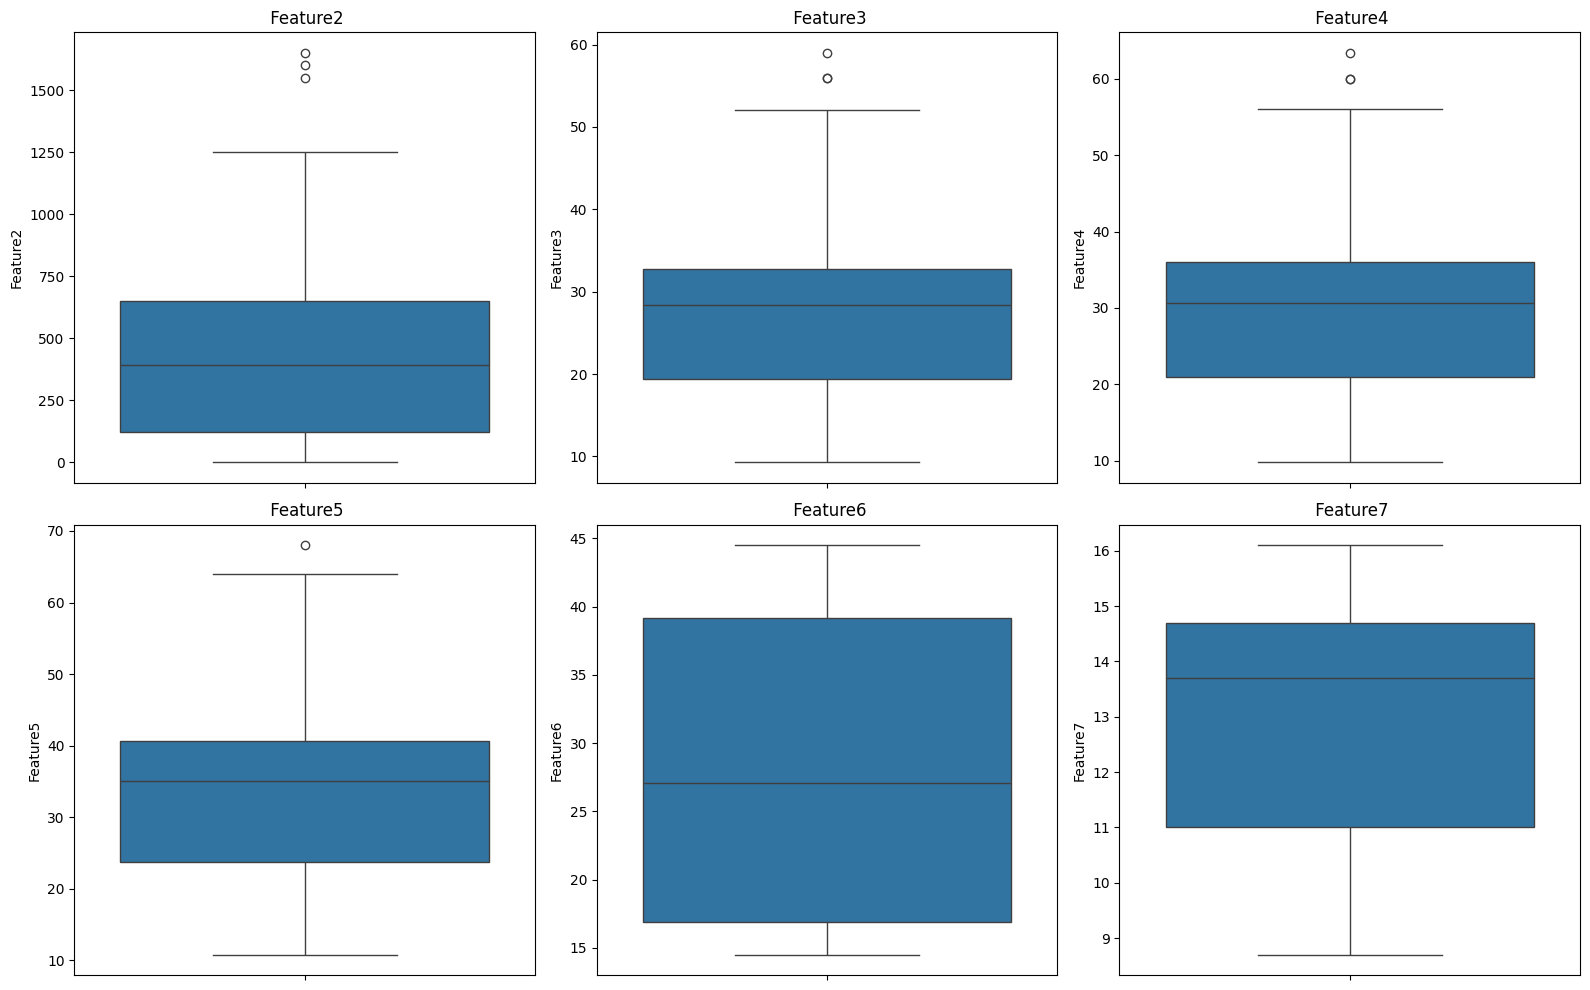

In [35]:
#check outliers
num_cols = df_fish.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_fish[col])
    plt.title(f' {col}')
    plt.tight_layout()

In [36]:
#clip outliers
num_cols = df_fish.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    Q1 = df_fish[col].quantile(0.25)
    Q3 = df_fish[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_fish[col] = df_fish[col].clip(lower=lower_bound, upper=upper_bound)

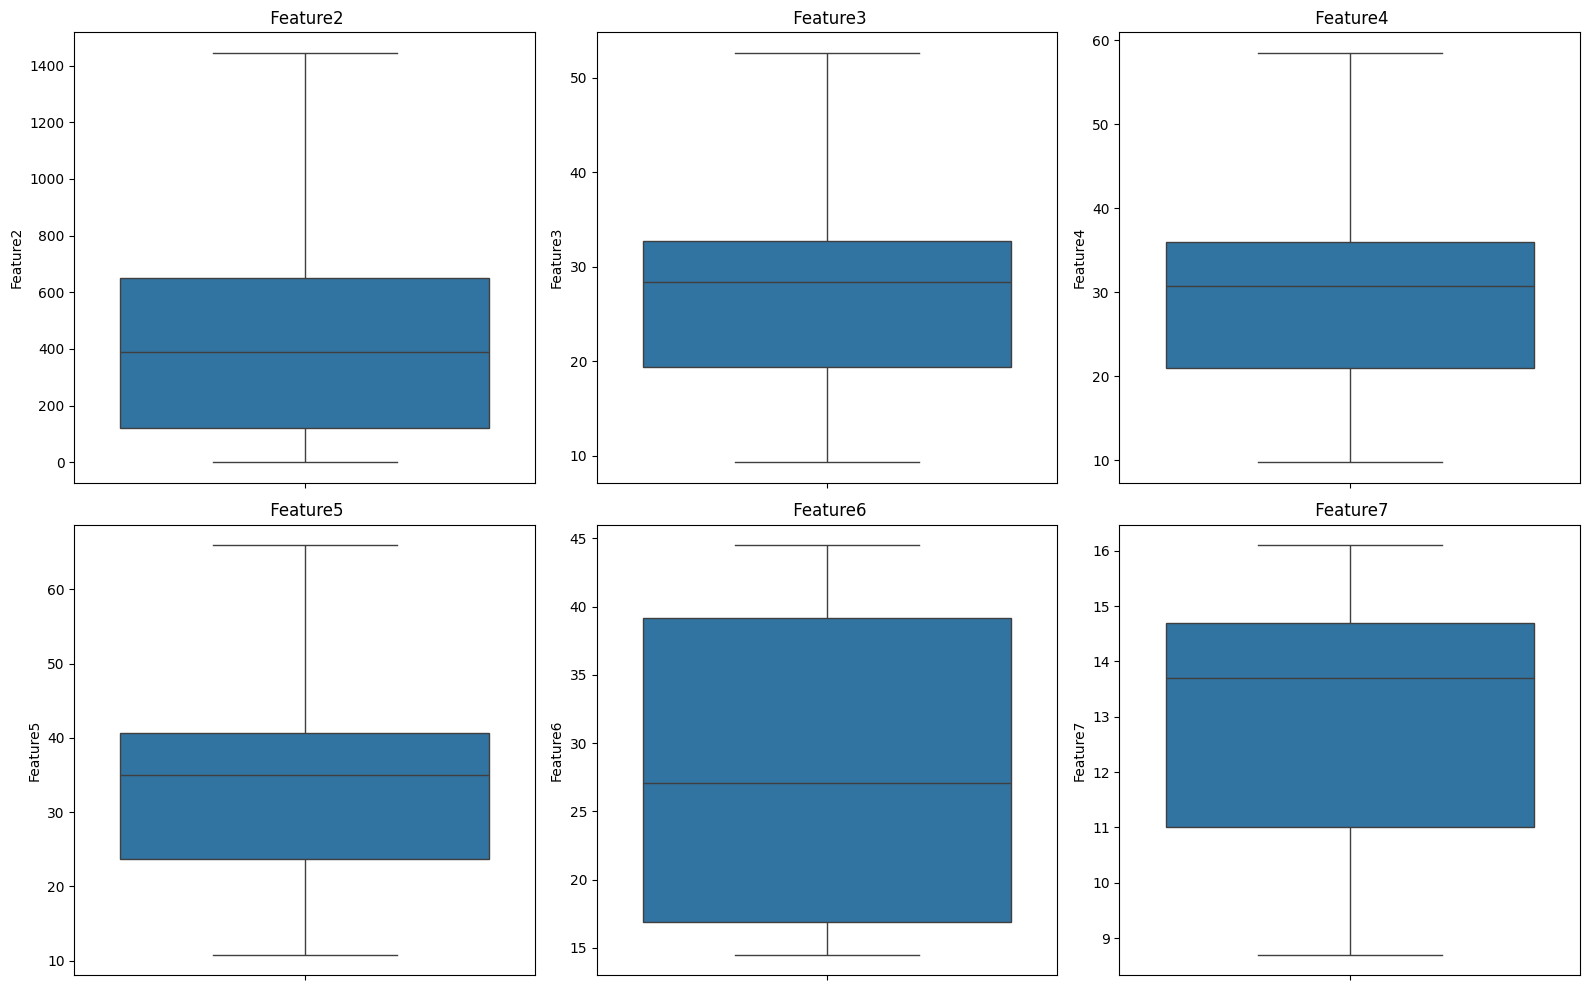

In [37]:
num_cols = df_fish.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_fish[col])
    plt.title(f' {col}')
    plt.tight_layout()

In [38]:
#scaling
numerical_cols = df_fish.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("🔢 Numerical columns to scale:", numerical_cols)

scaler = StandardScaler()
df_fish[numerical_cols] = scaler.fit_transform(df_fish[numerical_cols])
df_fish

🔢 Numerical columns to scale: ['Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7']


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7
0,Bream,-0.508431,-0.367784,-0.342304,-0.237105,1.003212,0.253740
1,Bream,-0.376004,-0.293956,-0.266512,-0.145200,1.158696,0.443765
2,Bream,-0.238060,-0.303184,-0.249669,-0.152859,1.139261,1.061347
3,Bream,-0.174605,-0.081700,-0.039135,0.030950,0.964342,0.206233
4,Bream,0.010240,-0.063243,-0.039135,0.069244,0.828293,1.061347
...,...,...,...,...,...,...,...
80,Pike,1.444862,1.948576,1.872519,1.685232,-1.154123,-0.791399
81,Pike,2.272529,2.290031,2.234638,2.037533,-0.988922,-0.553868
82,Pike,2.810512,2.350016,2.445173,2.366858,-1.270736,-1.551501
83,Pike,2.810512,2.350016,2.445173,2.366858,-1.270736,-1.551501


In [39]:
#one-hot encoding
cat_cols = df_fish.select_dtypes(include='object').columns
df_fish = pd.get_dummies(df_fish,dtype=int, columns=cat_cols, drop_first=True)
df_fish


,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature1_Pike,Feature1_Roach,Feature1_Smelt
0,-0.508431,-0.367784,-0.342304,-0.237105,1.003212,0.253740,0,0,0
1,-0.376004,-0.293956,-0.266512,-0.145200,1.158696,0.443765,0,0,0
2,-0.238060,-0.303184,-0.249669,-0.152859,1.139261,1.061347,0,0,0
3,-0.174605,-0.081700,-0.039135,0.030950,0.964342,0.206233,0,0,0
4,0.010240,-0.063243,-0.039135,0.069244,0.828293,1.061347,0,0,0
...,...,...,...,...,...,...,...,...,...
80,1.444862,1.948576,1.872519,1.685232,-1.154123,-0.791399,1,0,0
81,2.272529,2.290031,2.234638,2.037533,-0.988922,-0.553868,1,0,0
82,2.810512,2.350016,2.445173,2.366858,-1.270736,-1.551501,1,0,0
83,2.810512,2.350016,2.445173,2.366858,-1.270736,-1.551501,1,0,0


K means clustering

In [40]:
#for simplicity we consider only 2 columns
X=df_fish.iloc[:,[3,4]].values

In [41]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

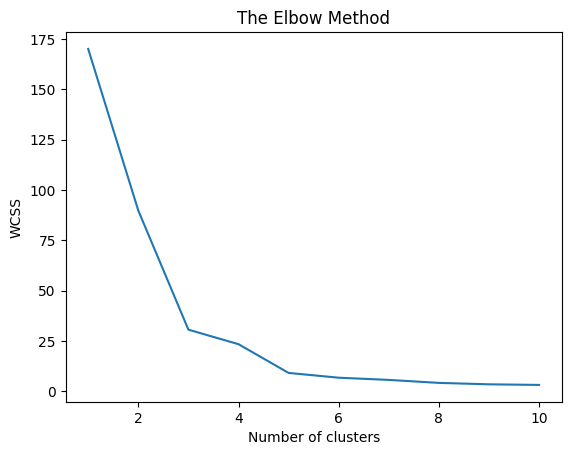

In [42]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
#from the elbow plot we can fix value of k as 5
#building k means clustering model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)#model building occur
#max_iter can be set if we need to fix no of iterations
y_kmeans=kmeans.fit_predict(X)  #output generation occur

In [44]:
df_fish['Cluster']=y_kmeans
df_fish.head()

,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature1_Pike,Feature1_Roach,Feature1_Smelt,Cluster
0,-0.508431,-0.367784,-0.342304,-0.237105,1.003212,0.253740,0,0,0,0
1,-0.376004,-0.293956,-0.266512,-0.145200,1.158696,0.443765,0,0,0,0
2,-0.238060,-0.303184,-0.249669,-0.152859,1.139261,1.061347,0,0,0,0
3,-0.174605,-0.081700,-0.039135,0.030950,0.964342,0.206233,0,0,0,0
4,0.010240,-0.063243,-0.039135,0.069244,0.828293,1.061347,0,0,0,0


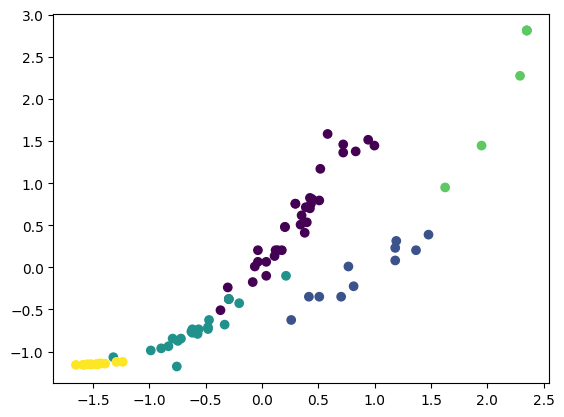

In [58]:
#clustering#taking 2 features
import matplotlib.pyplot as plt
plt.scatter(df_fish['Feature3'], df_fish['Feature2'], c=df_fish['Cluster'], cmap='viridis')
plt.show()



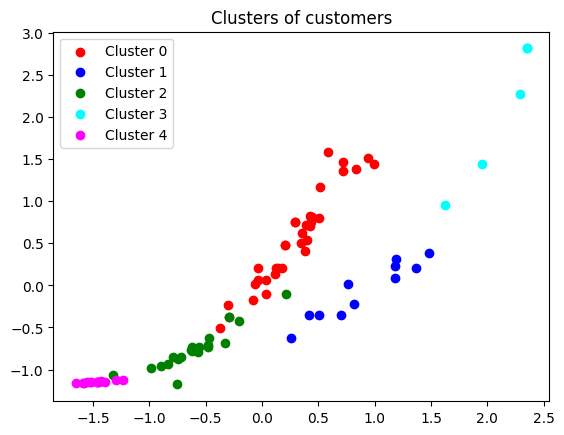

In [61]:
colors=['red','blue','green','cyan','magenta']
for i in range(5):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data['Feature3'],cluster_data['Feature2'],c=colors[i],label=f'Cluster {i}')
plt.title('Clusters of customers')
plt.legend()


plt.show()

In [65]:
#predict the cluster
def predict_cluster(Feature3,Feature2):
   new_data=[[Feature3,Feature2]]
   cluster=kmeans.predict(new_data)
   return cluster[0]

In [66]:
predicted_cluster=predict_cluster(50,100)
print("Predicted cluster:",predicted_cluster)

Predicted cluster: 0


Agglomerative clustering

In [81]:
ag_cluster= linkage(X, method='ward')#ward,singlee,centroid
#linkage matrix i.e;agglomerative cluster model

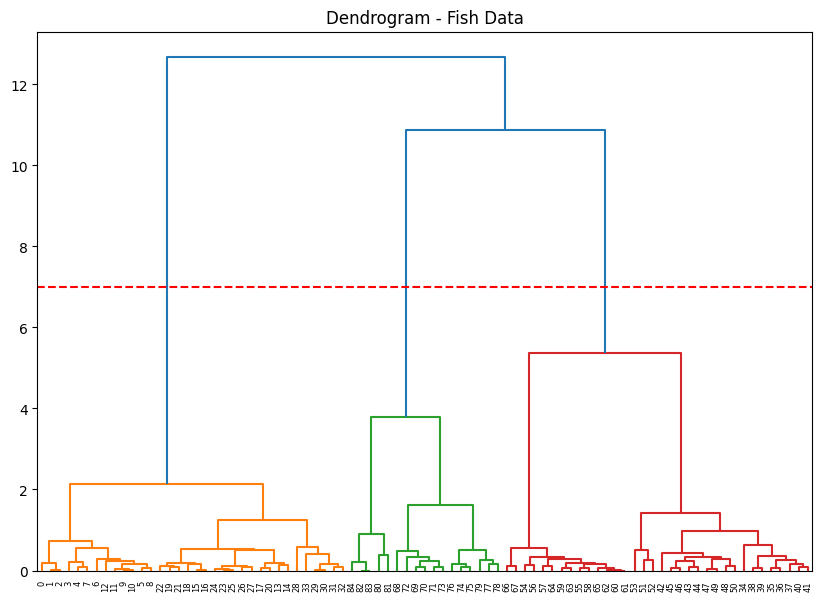

In [82]:
plt.figure(figsize=(10, 7))
dendrogram(ag_cluster)
plt.title('Dendrogram - Fish Data')
plt.axhline(y=7, color='r', linestyle='--')  # Adjust threshold by dendrogram
plt.show()

In [83]:
cluster_labels = fcluster(ag_cluster, t=6, criterion='maxclust')
df_fish['Cluster Agglomerative'] = cluster_labels
df_fish.head()

,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature1_Pike,Feature1_Roach,Feature1_Smelt,Cluster,Cluster Agglomerative
0,-0.508431,-0.367784,-0.342304,-0.237105,1.003212,0.253740,0,0,0,0,1
1,-0.376004,-0.293956,-0.266512,-0.145200,1.158696,0.443765,0,0,0,0,1
2,-0.238060,-0.303184,-0.249669,-0.152859,1.139261,1.061347,0,0,0,0,1
3,-0.174605,-0.081700,-0.039135,0.030950,0.964342,0.206233,0,0,0,0,1
4,0.010240,-0.063243,-0.039135,0.069244,0.828293,1.061347,0,0,0,0,1


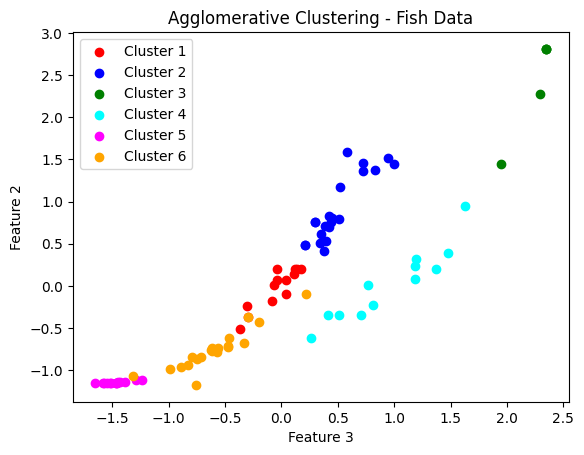

In [91]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta','orange']
for i in  range(1,len(df_fish['Cluster Agglomerative'].unique())+1):
    cluster_data = df_fish[df_fish['Cluster Agglomerative'] == i]
    plt.scatter(cluster_data['Feature3'],
              cluster_data['Feature2'],
              c=colors[i-1],
              label=f'Cluster {i}')

plt.title('Agglomerative Clustering - Fish Data')
plt.xlabel('Feature 3')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [87]:
df_fish['Cluster Agglomerative'].unique()

array([1, 2, 6, 5, 4, 3], dtype=int32)